<a href="https://colab.research.google.com/github/NiyonshutiDavid/IntroML-Summative/blob/main/ClintonPikita_notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
# List the contents of your Google Drive root directory
print(os.listdir('/content/drive/My Drive/ALU/BSE/Machine Learning/Datasets/'))

# If your data is in a specific folder, replace 'My Drive' with the folder path
# Example:
# print(os.listdir('/content/drive/My Drive/MyDataFolder'))

['water_potability.csv']


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras import regularizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
#LOAD THE DATA
data = pd.read_csv('/content/drive/My Drive/ALU/BSE/Machine Learning/Datasets/water_potability.csv')
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


Plot the Data Appropriately

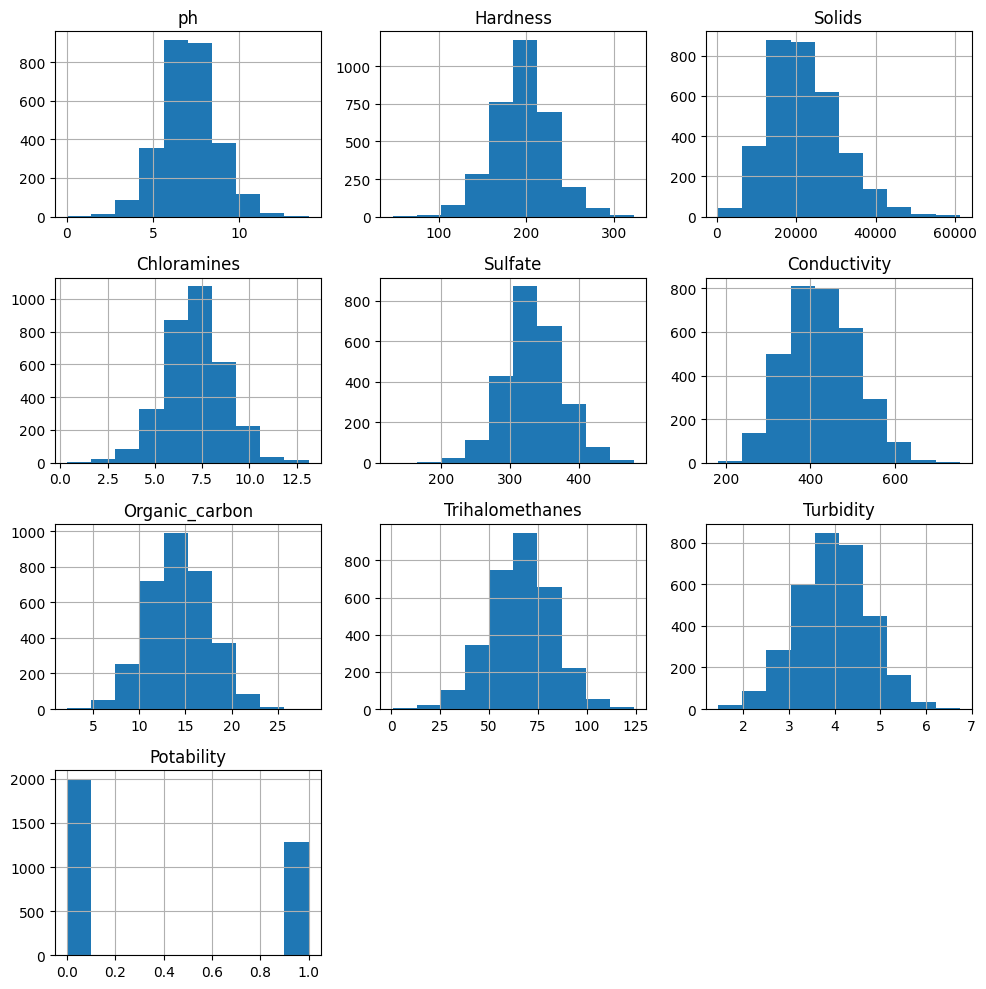

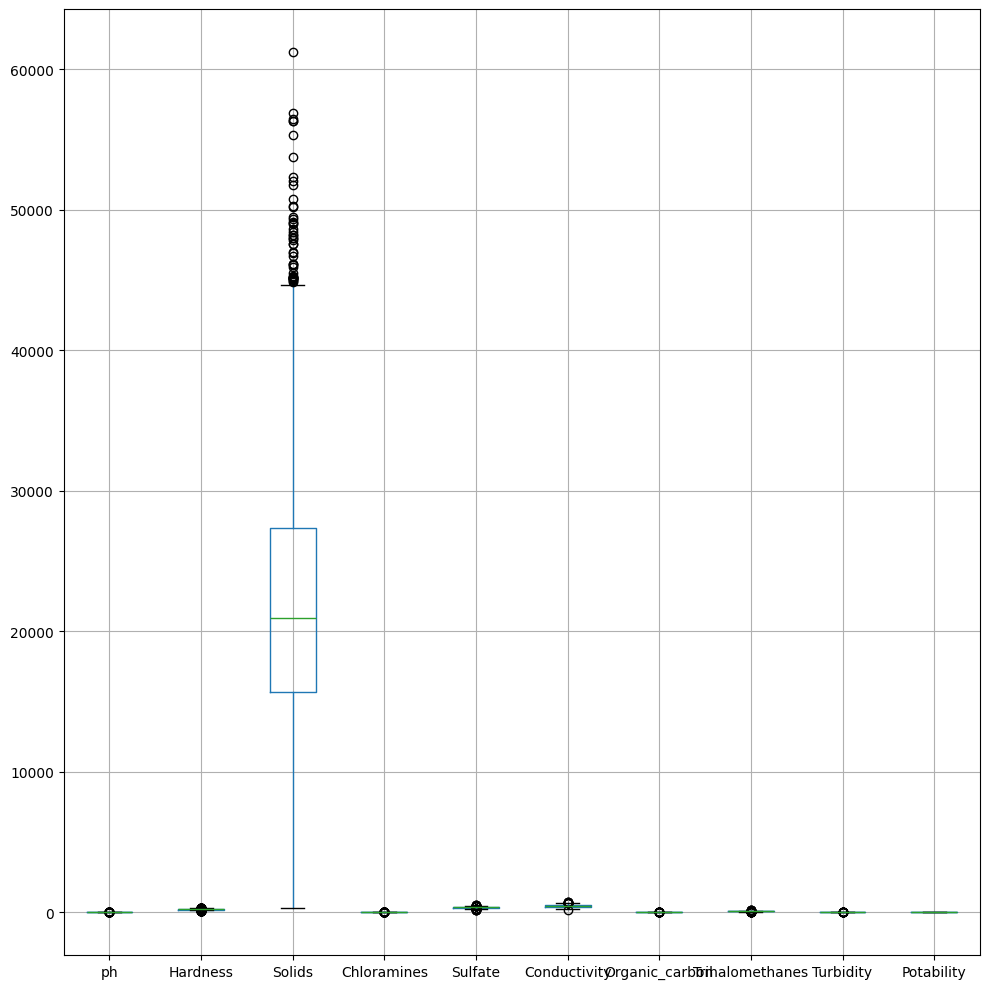

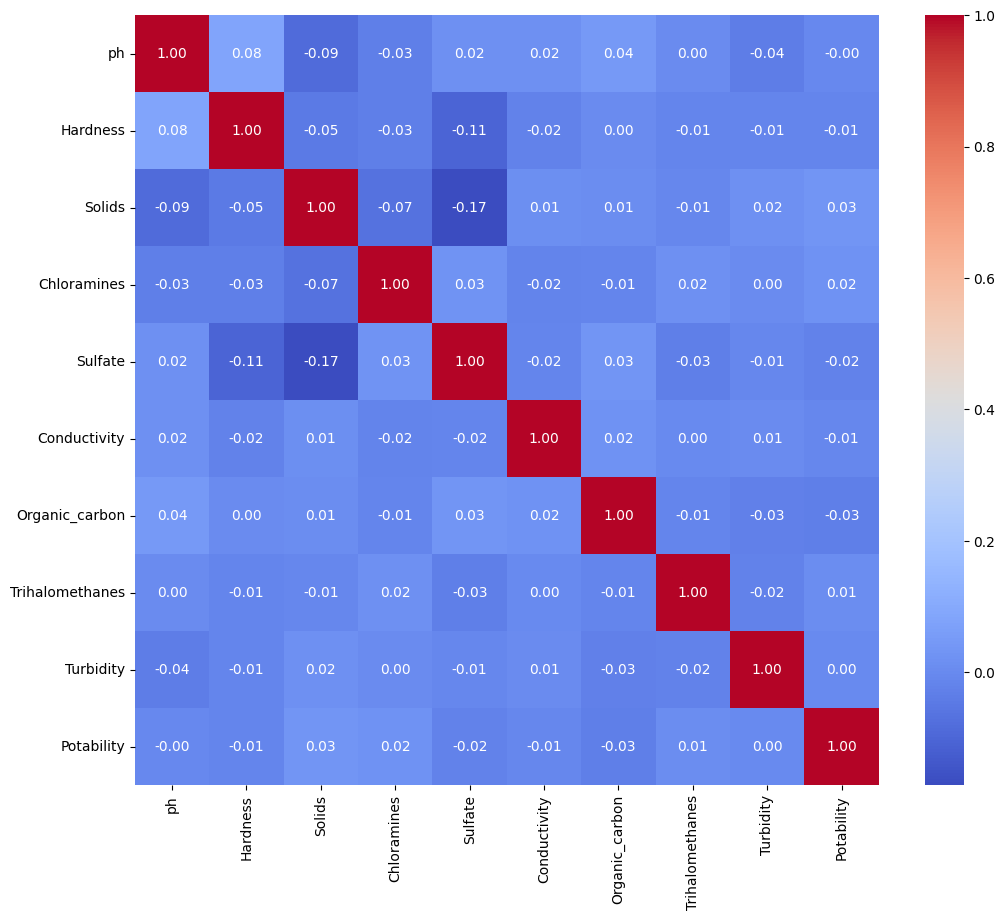

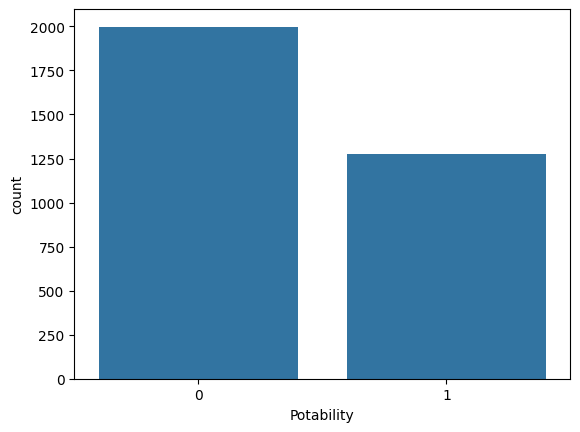

In [11]:
# plot the data

data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

data.boxplot(figsize=(10, 10))
plt.tight_layout()
plt.show()

import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

sns.countplot(x='Potability', data=data)
plt.show()

In [12]:
# show how many missing values and handle them by filling in the mean

print(data.isnull().sum())
data = data.fillna(data.mean())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [13]:
print(data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [14]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [15]:
# generate 2d classification dataset

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [16]:

# generate 2d classification dataset

X= data.drop('Potability', axis=1)
y = data['Potability']


In [17]:
print(X)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

In [18]:
# display input shape

print("Input shape: ", X.shape)

Input shape:  (3276, 9)


In [19]:
# split data into test, train, and validation

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (2293, 9)
Validation data shape: (491, 9)
Test data shape: (492, 9)


# Each Memeber Defines their model Here

In [20]:
#Model Definition by member
def clintonpikita_model():
    model = Sequential()
    model.add(Dense(62, activation='relu',
                    input_shape=(X_train.shape[1],),
                    kernel_regularizer=regularizers.l1(0.001))) # Changed to L1

    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l1(0.001))) # Changed to L1

    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    return model

In [21]:
# print the model summary
model = clintonpikita_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 62)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,669 (10.43 KB)

 Trainable params: 2,669 (10.43 KB)

 Non-trainable params: 0 (0.00 B)

# Start the training Process

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [24]:
# Fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5652 - loss: 813.3235 - val_accuracy: 0.4161 - val_loss: 19.6758
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5052 - loss: 18.0707 - val_accuracy: 0.5926 - val_loss: 16.5370
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5359 - loss: 12.1307 - val_accuracy: 0.5948 - val_loss: 36.2080
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5299 - loss: 21.6581 - val_accuracy: 0.4118 - val_loss: 17.9165
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5355 - loss: 16.7447 - val_accuracy: 0.4052 - val_loss: 52.8102
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5138 - loss: 24.5451 - val_accuracy: 0.4314 - val_loss: 7.8978
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5098 - loss: 9.5194 - val_accuracy: 0.5969 - val_loss: 24.7494
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5235 - loss: 14.8240 - val_accur

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5488 - loss: 4.0937 
Test Loss: 4.1009
Test Accuracy: 0.5569


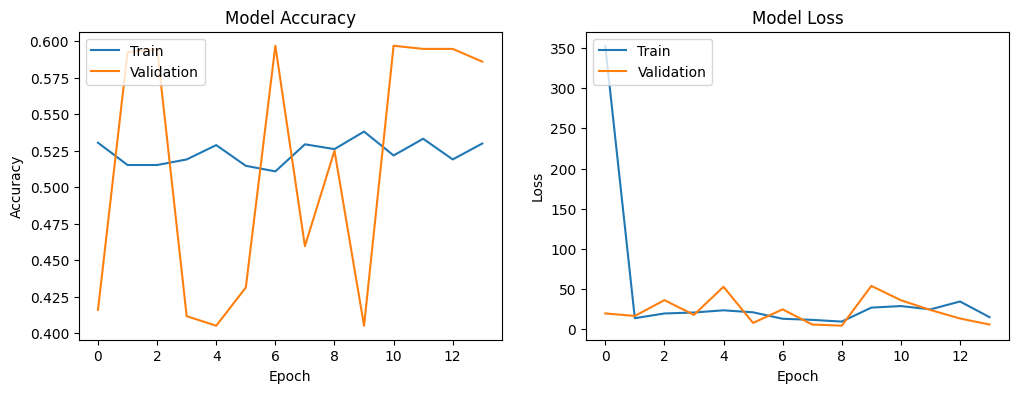

In [25]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


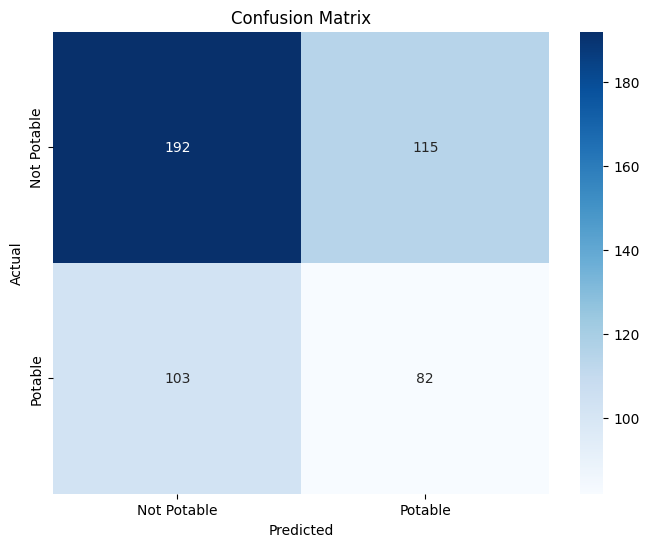


Classification Report:
              precision    recall  f1-score   support

 Not Potable       0.65      0.63      0.64       307
     Potable       0.42      0.44      0.43       185

    accuracy                           0.56       492
   macro avg       0.53      0.53      0.53       492
weighted avg       0.56      0.56      0.56       492



In [26]:
# Confusion matrix (visualized)
# ✅ Precision, Recall, F1-score, and Accuracy printed per class

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Potable', 'Potable']))

In [27]:
#the model accuracy

print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5569


In [28]:

# Save the entire model to a single file
model.save('Clinton_Pikita_model.keras')

# Verify the file exists
!ls -l Clinton_Pikita_model_model.keras

ls: cannot access 'Clinton_Pikita_model_model.keras': No such file or directory


In [29]:

# Load the saved model
loaded_model = tf.keras.models.load_model('Clinton_Pikita_model.keras')

# Get the first row of the original data (before splitting) for prediction
first_row_data = data.drop('Potability', axis=1).iloc[[0]]

# Predict the single entry point of the first row of data
prediction_proba_first_row = loaded_model.predict(first_row_data)
prediction_first_row = (prediction_proba_first_row > 0.5).astype(int)

print("\nFirst Row of Original Data for Prediction:")
print(first_row_data)
print("\nPrediction Probability for First Row:", prediction_proba_first_row[0][0])
print("Predicted Class for First Row (0: Not Potable, 1: Potable):", prediction_first_row[0][0])
# comparing to the actual potability of the first row
print("Actual Class for First Row:", data['Potability'].iloc[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

First Row of Original Data for Prediction:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783         86.99097   2.963135  

Prediction Probability for First Row: 5.5097e-07
Predicted Class for First Row (0: Not Potable, 1: Potable): 0
Actual Class for First Row: 0
